In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pickle
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [3]:
data=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
(x_train, y_train), (x_test, y_test)=data

In [7]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [15]:
y_train_oh=to_categorical(y_train)
y_test_oh=to_categorical(y_test)
x_train_vec=x_train.reshape(60000,-1)/255.0
x_test_vec=x_test.reshape(10000,-1)/255.0

In [41]:
model=Sequential()
model.add(Input(shape=(x_train_vec.shape[1],)))
model.add(Dense(x_train_vec.shape[1],activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
res=model.fit(x_train_vec,y_train_oh,epochs=3,validation_data=(x_test_vec,y_test_oh))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7883 - loss: 0.5835 - val_accuracy: 0.8458 - val_loss: 0.4253
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8660 - loss: 0.3584 - val_accuracy: 0.8559 - val_loss: 0.3964
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8815 - loss: 0.3171 - val_accuracy: 0.8684 - val_loss: 0.3623


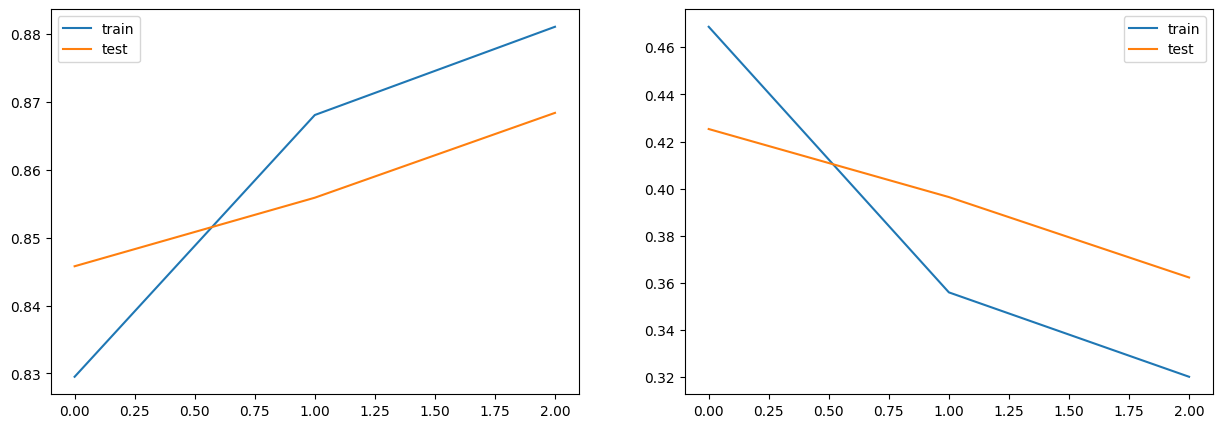

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])


plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test'])

In [45]:
model.save('fashion_mnist.h5')